Your Name and PRN:
- Name : Pankaj Gaikwad
- PRN  : 250840128022
- Date : 12-11-2025

# Deep Neural Networks
## Assignment 02


## Take Single Layer Model and add Sigmoid activation function

In [150]:
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [151]:
RANDOM_STATE=24
np.random.seed(RANDOM_STATE)
rng=np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE=0.2
NOISE=0.2
EPOCHS=2
ALPHA=0.001
N_SAMPLE=1000
params={"legend.fontsi"}

In [152]:
X,y=make_moons(n_samples=N_SAMPLE,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)

In [153]:
data_df=pd.DataFrame(X,columns=["A","B"])
data_df["target"]=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [154]:
data_train,data_test=data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [164]:
data_train

array([[ 0.90633951,  0.90267624,  0.        ],
       [-1.11536828,  0.75579289,  0.        ],
       [ 1.88769158,  0.4175967 ,  1.        ],
       ...,
       [ 0.81249096, -0.05083979,  0.        ],
       [ 0.86329816,  0.61714755,  0.        ],
       [ 2.0966594 , -0.05107625,  1.        ]], shape=(900, 3))

In [155]:
def fn_sigmoid(z:np.ndarray)->float:
    return 1/(1+np.exp(-z))


In [156]:
sm=fn_sigmoid(np.asarray([-np.inf,-1,0,1.0,np.inf]))
sm

array([0.        , 0.26894142, 0.5       , 0.73105858, 1.        ])

In [157]:
def predict(row,weights):
    z=weights[0]
    for i in range(len(row)-1):
        z+=weights[i+1] * row[i]
    return fn_sigmoid(z)

In [158]:
def train_weighs(train,alpha,n_epochs):

    error=[]

    weight=rng.random(train.shape[1])

    m=train.shape[0]

    for epoch in range(n_epochs):
        sum_error=0
        for row in train:
            a=predict(row,weight)
            dz=a-row[-1] #a-y
            sum_error+=-row[-1] * np.log(a) - (1-row[-1]) * np.log(1-a)
            weight[0]=weight[0]-alpha*dz
            for i in range(len(row)-1):
                weight[i+1]=weight[i+1]-alpha*dz*row[i]
        error.append(sum_error/m)
    return error,weight


In [159]:
error,weight=train_weighs(train=data_train,alpha=ALPHA,n_epochs=EPOCHS)

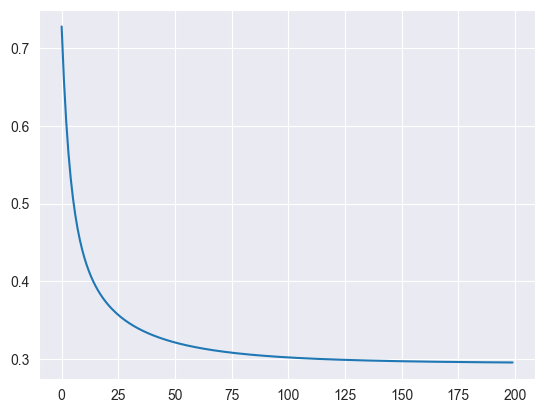

In [160]:

plt.plot(error)
plt.show()

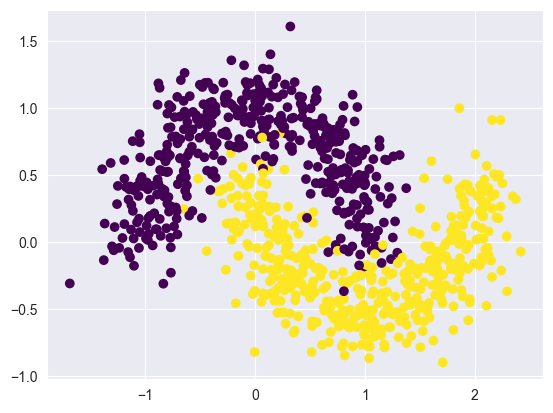

In [161]:
plt.scatter(data_train[:,0],data_train[:,1],c=data_train[:,-1],cmap="viridis")

In [162]:
def fn_plot_decision_boundary(data_train,weights,predict):
    fig,ax=plt.subplots()
    dm=0.01
    margin=10*dm
    x_max,x_min=X[:,0].max()+margin,X[:,0].min()-margin
    y_max,y_min=X[:,1].max()+margin,X[:,1].min()-margin
    xx,yy=np.meshgrid(np.arange(x_min,x_max,dm),np.arange(y_min,y_max,dm))
    X_plot=np.c_[xx.ravel(),yy.ravel()]
    X_plot=np.hstack((X_plot,np.ones((X_plot.shape[0],1))))

    y_pred=[]
    for row in (X_plot):
        a=predict(row,weight)
        y_p=0
        if(a>0.5):
            y_p=1
        y_pred.append(y_p)
    Z=np.array(y_pred).reshape(xx.shape)
    ax.contourf(xx,yy,Z,alpha=0.6,cmap="rainbow")
    ax.scatter(X[:,0],X[:,1],c=y,cmap="viridis")
    plt.show()

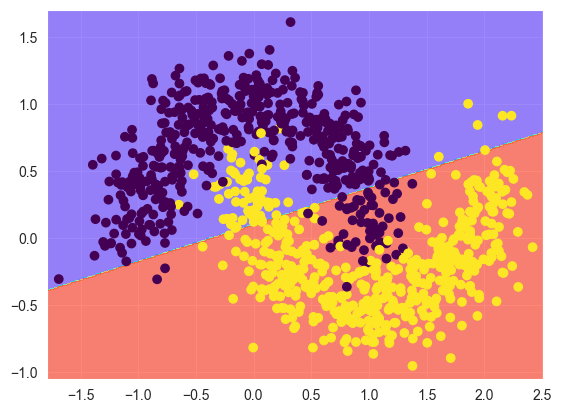

In [163]:
fn_plot_decision_boundary(data_train,weight,predict)